In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import load_model
from sklearn.metrics import confusion_matrix

# load data

In [43]:
# read original data from 
data = pd.read_csv('../../../dataframes/DF_prest.csv', index_col=0)

# setup 'docs' for use with Tokenizer
def nt_seq_doc(nt_sequence):
    if 'GACAAGCTTGCGGCCGCA' not in nt_sequence:
        return None
    true_nt = nt_sequence.split('GACAAGCTTGCGGCCGCA')[1]
    if len(true_nt) % 3 != 0:
        return None
    return ' '.join([true_nt[i:i+3] 
                     for i in range(0, len(true_nt), 3)])
# split quantiles
def assign_class(conc):
    if conc <= low_cut:
        return 0
    elif conc >= high_cut:
        return 1
    return

data['nt_seq_doc'] = data['nt_seq'].apply(nt_seq_doc)
data = data[pd.notnull(data['nt_seq_doc'])]

# identify high and low classes by conc_cf quantiles
low_cut = data['conc_cf'].quantile(0.50)
high_cut = data['conc_cf'].quantile(0.50)

data['class'] = data['conc_cf'].apply(assign_class)
data = data[pd.notnull(data['class'])]
# check shape
print('data shape: ', data.shape)

data shape:  (44694, 8)


In [44]:
# define sequence documents
docs = list(data['nt_seq_doc'])
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

# integer encode documents
X = t.texts_to_sequences(docs)
y = data['class'].values

# create test-train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# fix random seed for reproducibility
np.random.seed(7)

# load the dataset but only keep the top n words, zero the rest
top_words = len(t.word_index) + 1

# truncate and pad input sequences
#seq_lengths = [len(seq) for seq in X]
#max_seq_length = max(seq_lengths)
max_seq_length = 181
X_train = sequence.pad_sequences(X_train, maxlen=max_seq_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_seq_length)
X_test.shape

(13409, 181)

# load models

In [29]:
def plot_confusion_matrix(filename, x, y_true):
    model = load_model(filename)
    y_pred = model.predict(x)
    y_pred = np.concatenate(y_pred.round())
    
    confusion = confusion_matrix(y_true, y_pred)
    Index= ['0', '1']
    Cols = ['0', '1']
    df = pd.DataFrame(confusion, index=Index, columns=Cols)

    sns.heatmap(df, annot=True, cmap='viridis')
    print(confusion)

[[1043  301]
 [ 394  947]]


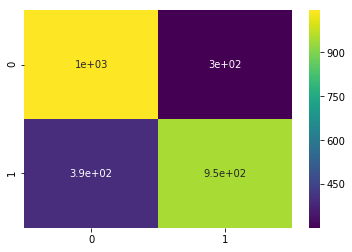

In [30]:
plot_confusion_matrix('10_90_model.h5', X_test, y_test)

[[1813  844]
 [ 568 2153]]


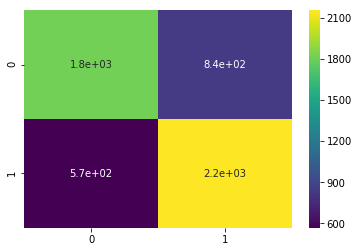

In [33]:
plot_confusion_matrix('20_80_model.h5', X_test, y_test)

[[2522 1506]
 [ 866 3152]]


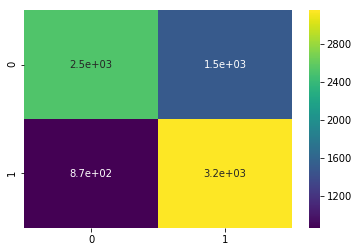

In [42]:
plot_confusion_matrix('30_70_model.h5', X_test, y_test)

[[3555 1772]
 [1606 3805]]


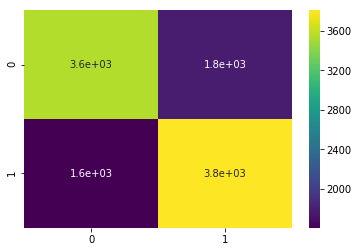

In [39]:
plot_confusion_matrix('40_60_model.h5', X_test, y_test)

[[3904 2820]
 [1913 4772]]


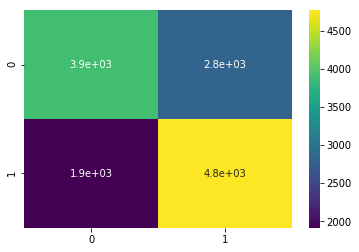

In [45]:
plot_confusion_matrix('50_50_model.h5', X_test, y_test)

In [46]:
model = load_model('20_80_model.h5')

In [52]:
model.layers[0].get_weights()[0]

array([[ 0.09854518, -0.03367235, -0.00186118, ..., -0.018999  ,
        -0.05020548,  0.1576364 ],
       [-0.01488403, -0.36079583, -0.1615202 , ...,  0.01810673,
         0.17191626,  0.06440058],
       [ 0.00921475, -0.01058883,  0.1841158 , ..., -0.04851773,
        -0.18820985, -0.17169054],
       ...,
       [-0.14998725, -0.02713926, -0.20788358, ..., -0.05084847,
         0.05882473, -0.13223477],
       [-0.03161937,  0.35951096, -0.13756022, ...,  0.00779559,
         0.19360694,  0.14625882],
       [ 0.04418515, -0.26945797, -0.00612014, ..., -0.37091446,
         0.01891404, -0.2514783 ]], dtype=float32)